## Text Classification: Document 2 vector

### Libraries

In [1]:

#Importing libraries
import os
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import nltk

### Tweet Data

In [4]:
tweets = pd.read_csv("tweets.csv")

In [5]:
tweets

,Tweet,Avg
0,"I have to say, Apple has by far the best custo...",2.0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2.0
2,LOVE U @APPLE,1.8
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1.8
4,.@apple has the best customer service. In and ...,1.8
...,...,...
1176,freak @apple,-2.0
1177,WHY CANT I freakING SEE PICTURES ON MY TL IM A...,-2.0
1178,@APPLE YOU freakING COWS freak YOU,-2.0
1179,@apple I hate you why is my phone not working ...,-2.0


In [6]:
tweets=tweets.loc[tweets.Avg!=0]#Removing 0,since it forms most of values

In [7]:
tweets=tweets.reset_index()

In [8]:
len(tweets.loc[tweets.Avg==0])#Checking if there are 0s

0

### Test Pre-processing

#### 1. Converting the text into lower cases

In [9]:
#Convert a string into lower case
twt = tweets.Tweet[1]
twt.lower()

'ios 7 is so fricking smooth & beautiful!! #thanxapple @apple'

In [10]:
#normalizing all the tweets
tweets['Tweet']=tweets['Tweet'].str.lower()

In [11]:
tweets

,index,Tweet,Avg
0,0,"i have to say, apple has by far the best custo...",2.0
1,1,ios 7 is so fricking smooth & beautiful!! #tha...,2.0
2,2,love u @apple,1.8
3,3,"thank you @apple, loving my new iphone 5s!!!!!...",1.8
4,4,.@apple has the best customer service. in and ...,1.8
...,...,...,...
839,1176,freak @apple,-2.0
840,1177,why cant i freaking see pictures on my tl im a...,-2.0
841,1178,@apple you freaking cows freak you,-2.0
842,1179,@apple i hate you why is my phone not working ...,-2.0


#### 2. Remove Punctuations/special symbols and 

In [12]:
#Removing punctuation from a single tweet
import string
p = string.punctuation
remv_punc = str.maketrans("", "", p)
twt.translate(remv_punc)

'iOS 7 is so fricking smooth  beautiful ThanxApple Apple'

In [13]:
p

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
#Removing punctuation from all the tweets
tweets.Tweet=tweets.Tweet.str.translate(remv_punc)
tweets

,index,Tweet,Avg
0,0,i have to say apple has by far the best custom...,2.0
1,1,ios 7 is so fricking smooth beautiful thanxap...,2.0
2,2,love u apple,1.8
3,3,thank you apple loving my new iphone 5s apple...,1.8
4,4,apple has the best customer service in and out...,1.8
...,...,...,...
839,1176,freak apple,-2.0
840,1177,why cant i freaking see pictures on my tl im a...,-2.0
841,1178,apple you freaking cows freak you,-2.0
842,1179,apple i hate you why is my phone not working i...,-2.0


#### 3. Remove stopwords (and the word "apple")

In [15]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ABC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
#NLTK stopword list
stop_words = stopwords.words("english")
len(stop_words)

179

In [17]:
#Adding the word apple to the list of stopwords
stop_words.append("apple")
len(stop_words)

180

In [18]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
#Remove stop words from a single tweet
" ".join([w for w in tweets.Tweet[0].split() if w not in stop_words])

'say far best customer care service ever received appstore'

In [20]:
#Removing stopwords from all the tweets
tweets.Tweet=tweets.Tweet.apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words]))
tweets

,index,Tweet,Avg
0,0,say far best customer care service ever receiv...,2.0
1,1,ios 7 fricking smooth beautiful thanxapple,2.0
2,2,love u,1.8
3,3,thank loving new iphone 5s iphone5s pictwitter...,1.8
4,4,best customer service new phone 10min,1.8
...,...,...,...
839,1176,freak,-2.0
840,1177,cant freaking see pictures tl im annoyed freak...,-2.0
841,1178,freaking cows freak,-2.0
842,1179,hate phone working im going freak,-2.0


#### 4. Remove white spaces

In [21]:
for i in range(len(tweets.Tweet)):
    tweets.Tweet[i] = tweets.Tweet[i].replace("  ", " ").strip()
tweets.Tweet

0      say far best customer care service ever receiv...
1             ios 7 fricking smooth beautiful thanxapple
2                                                 love u
3      thank loving new iphone 5s iphone5s pictwitter...
4                  best customer service new phone 10min
                             ...                        
839                                                freak
840    cant freaking see pictures tl im annoyed freak...
841                                  freaking cows freak
842                    hate phone working im going freak
843                   agounalakis thats nasty nasty brat
Name: Tweet, Length: 844, dtype: object

### Document 2 vectors

#### Get embeddings

In [22]:
import nltk
from gensim.models import KeyedVectors
import pickle # Python object serialization library. Not secure

In [23]:
embeddings = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary = True,unicode_errors='ignore')

In [24]:
tweets=tweets.drop('index',axis=1)

In [25]:
tweets

,Tweet,Avg
0,say far best customer care service ever receiv...,2.0
1,ios 7 fricking smooth beautiful thanxapple,2.0
2,love u,1.8
3,thank loving new iphone 5s iphone5s pictwitter...,1.8
4,best customer service new phone 10min,1.8
...,...,...
839,freak,-2.0
840,cant freaking see pictures tl im annoyed freak...,-2.0
841,freaking cows freak,-2.0
842,hate phone working im going freak,-2.0


In [26]:
def vec(w):
    return(embeddings[w])

In [27]:
#saving words in embeddings to variable word
word=embeddings.index_to_key

In [28]:
" ".join([w for w in tweets.Tweet[843].split() if w in word])

'thats nasty nasty brat'

In [29]:
#removing words from tweets which are not present in embeddings,stemming is not done because stem words are absent in google vectors
tweets.Tweet=tweets.Tweet.apply(lambda x: ' '.join([w for w in x.split() if w in word]))
tweets

,Tweet,Avg
0,say far best customer care service ever receiv...,2.0
1,ios 7 fricking smooth beautiful,2.0
2,love u,1.8
3,thank loving new iphone 5s,1.8
4,best customer service new phone,1.8
...,...,...
839,freak,-2.0
840,cant freaking see pictures tl im annoyed freak...,-2.0
841,freaking cows freak,-2.0
842,hate phone working im going freak,-2.0


In [30]:
tweets

,Tweet,Avg
0,say far best customer care service ever receiv...,2.0
1,ios 7 fricking smooth beautiful,2.0
2,love u,1.8
3,thank loving new iphone 5s,1.8
4,best customer service new phone,1.8
...,...,...
839,freak,-2.0
840,cant freaking see pictures tl im annoyed freak...,-2.0
841,freaking cows freak,-2.0
842,hate phone working im going freak,-2.0


In [32]:
#Removing empty tweet from dataset to prevent key error
tweets=tweets.loc[tweets.Tweet!=''].reset_index()

In [33]:
#creating a list to add tweet vectors of size 300 each
doc2vec=[]
for i in range(0,len(tweets)):
    print(i)
    vdoc=[vec(x) for x in tweets.Tweet[i].split(" ")]
    d2v=np.sum(vdoc,axis=0)
    doc2vec.append(d2v)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [34]:
len(doc2vec)

837

In [35]:
#Created just for experiment
tweet=tweets.copy()

In [36]:
tweet['doc2vec']=doc2vec

In [37]:
tweets

,index,Tweet,Avg
0,0,say far best customer care service ever receiv...,2.0
1,1,ios 7 fricking smooth beautiful,2.0
2,2,love u,1.8
3,3,thank loving new iphone 5s,1.8
4,4,best customer service new phone,1.8
...,...,...,...
832,839,freak,-2.0
833,840,cant freaking see pictures tl im annoyed freak...,-2.0
834,841,freaking cows freak,-2.0
835,842,hate phone working im going freak,-2.0


In [38]:
doc2vec[0][1]

-0.095336914

In [39]:
#converting doc2vec to array to transform it to dataframe
array=np.array(doc2vec)

In [40]:
array

array([[-0.49316406, -0.09533691,  0.29614258, ..., -0.07128906,
         0.31359863, -0.5703125 ],
       [ 0.2617798 , -0.1171875 ,  0.26416016, ..., -0.6100464 ,
        -0.10913086,  0.4597168 ],
       [-0.1508789 , -0.10571289,  0.1899414 , ..., -0.36914062,
        -0.17651367,  0.25341797],
       ...,
       [ 0.58691406, -0.0168457 ,  0.00164795, ...,  0.24084473,
         0.08554077, -0.06054688],
       [ 0.34735107,  0.3092041 ,  0.3109131 , ..., -0.05541992,
         0.21899414, -0.15893555],
       [ 0.38671875,  0.05212402,  0.18286133, ..., -0.12866211,
        -0.04675293,  0.41381836]], dtype=float32)

In [41]:
data=pd.DataFrame()

In [42]:
#creating an empty dataframe with vectors0-299
for i in range(0,300):
    data['vec'+str(i)]=0

In [43]:
#adding values from doc2vec to vectors,using column names from empty data
vectors=pd.DataFrame(array,columns=data.columns)

In [44]:
vectors

,vec0,vec1,vec2,vec3,vec4,vec5,vec6,vec7,vec8,vec9,...,vec290,vec291,vec292,vec293,vec294,vec295,vec296,vec297,vec298,vec299
0,-0.493164,-0.095337,0.296143,0.540649,-0.170532,0.215515,0.673096,-0.081055,1.091064,0.981018,...,-0.279327,0.084229,-1.071533,0.579533,0.664551,0.483276,-0.215881,-0.071289,0.313599,-0.570312
1,0.261780,-0.117188,0.264160,-0.001953,-0.431274,0.064209,0.576843,-0.428833,0.376465,0.780273,...,-0.202026,0.261108,-0.687988,-0.214279,-0.215454,0.129150,-0.666016,-0.610046,-0.109131,0.459717
2,-0.150879,-0.105713,0.189941,0.146729,-0.448242,-0.060059,0.079102,-0.544922,-0.199707,0.302246,...,0.082275,0.326172,-0.358398,-0.585938,-0.205322,-0.469727,-0.130859,-0.369141,-0.176514,0.253418
3,-0.685974,-0.154663,0.053223,0.654785,-0.353271,-0.230469,0.068115,-0.525146,-0.131836,0.474243,...,0.090332,0.766357,-0.982422,-0.664551,-0.309082,-0.283630,-0.598259,0.078613,-0.448792,0.520508
4,-0.210693,0.010620,0.281250,0.090088,0.067139,-0.029053,-0.178711,0.016846,0.424316,0.662659,...,0.328705,0.305664,-0.824219,0.041870,0.265381,0.335083,-0.138672,0.325439,-0.018555,-0.471680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,0.205078,-0.007080,0.005554,0.128906,-0.085449,0.328125,0.163086,-0.259766,-0.080566,-0.119141,...,0.353516,0.190430,-0.112793,-0.081055,-0.192383,-0.320312,-0.082520,0.021118,-0.021606,-0.081055
833,0.735931,0.201782,0.265518,1.291504,-1.499268,0.956970,0.374115,-1.322784,0.530029,0.329895,...,0.783691,1.047729,-0.649292,-0.248840,-1.650391,-1.156738,-0.439453,-0.505722,-0.418335,0.028564
834,0.586914,-0.016846,0.001648,0.423340,-0.325684,0.740234,0.166382,-0.296600,0.048584,-0.116699,...,0.114258,0.328918,-0.202637,0.109863,-0.231445,-0.142578,-0.358887,0.240845,0.085541,-0.060547
835,0.347351,0.309204,0.310913,0.426514,-0.717896,0.939087,0.136658,-0.739258,0.257324,0.149170,...,-0.155029,0.922363,-0.669189,-0.155579,-0.644287,-0.572754,-0.270996,-0.055420,0.218994,-0.158936


### Classification Model

#### 1. Train-Validation-Test Split

In [45]:
#classifying tweets<= as true
y = tweets.Avg <= 0
y

0      False
1      False
2      False
3      False
4      False
       ...  
832     True
833     True
834     True
835     True
836     True
Name: Avg, Length: 837, dtype: bool

In [46]:
#For test-train split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(vectors, y, test_size = 0.2,stratify=y)
x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size = 0.2,stratify=y_test)


In [47]:
len(y.loc[y==True])

536

Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [49]:
dt=DecisionTreeClassifier(max_depth=6)

In [50]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

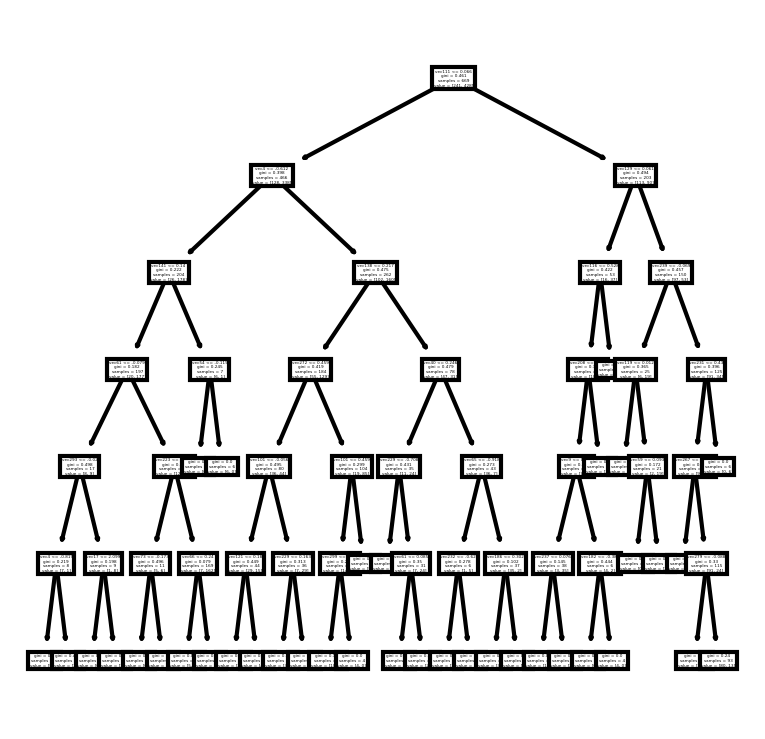

In [51]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(figsize=(3,3),dpi=300)
tree.plot_tree(dt,feature_names=vectors.columns,filled=False)
plt.show()

In [52]:
path=DecisionTreeClassifier()
ccp_alphas=path.cost_complexity_pruning_path(x_train, y_train)

In [53]:
ccp=ccp_alphas['ccp_alphas']

In [54]:
from sklearn.metrics import *
acc_train=[]
acc_test=[]
for i in ccp:
    dt1=DecisionTreeClassifier(ccp_alpha=i,max_depth=6)
    dt1.fit(x_train,y_train)
    y_train_pred=dt1.predict(x_train)
    y_test_pred=dt1.predict(x_test)
    acc_train.append(accuracy_score(y_train,y_train_pred))
    acc_test.append(accuracy_score(y_test,y_test_pred))
list(ccp)[acc_test.index(max(acc_test))]

0.011538381182221072

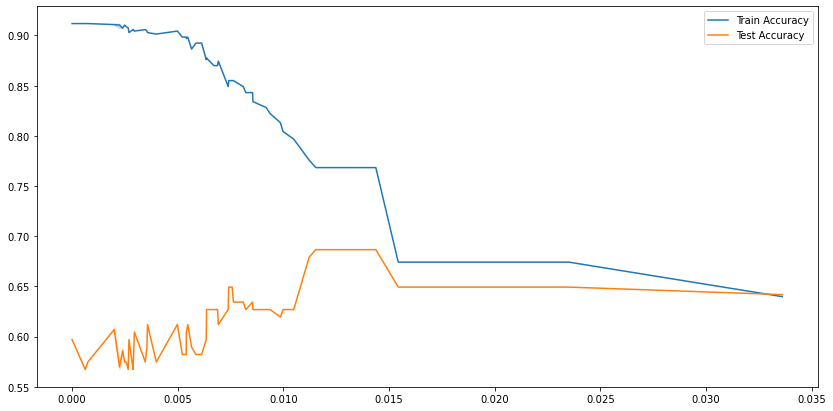

In [55]:
import seaborn as sns
plt.figure(figsize=(14,7))
sns.lineplot(y=acc_train,x=ccp,label='Train Accuracy')
sns.lineplot(y=acc_test,x=ccp,label='Test Accuracy')
plt.show()

In [56]:
#Train acc is highest at alpha equal to 0.06
dtp=DecisionTreeClassifier(ccp_alpha=list(ccp)[acc_test.index(max(acc_test))])

In [57]:
dtp.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.011538381182221072)

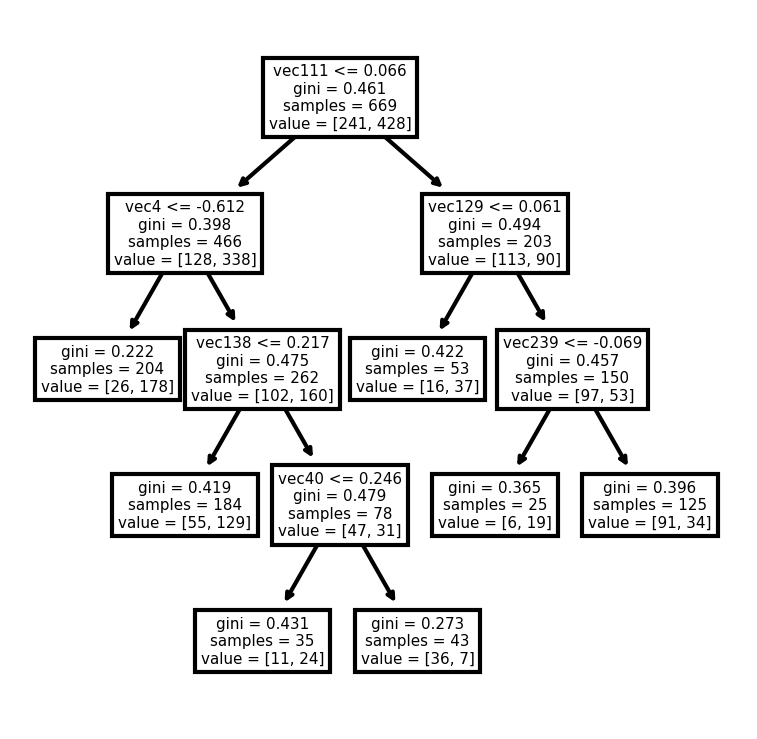

In [58]:
fig,axes=plt.subplots(figsize=(3,3),dpi=300)
tree.plot_tree(dtp,feature_names=vectors.columns,filled=False)
plt.show()

In [59]:
dtp.score(x_train,y_train)

0.7683109118086696

In [60]:
dtp.score(x_test,y_test)

0.6865671641791045

In [61]:
dt.score(x_test,y_test)

0.5970149253731343

In [62]:
dt.score(x_train,y_train)

0.9103139013452914

In [63]:
#As you can see dtp score is higher for test data than unpruned dt. dtp is pruned tree,dt is unpruned. The overall performance
#is higher than tf but lower than idf vectors.

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf=RandomForestClassifier(max_depth=6)

In [66]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6)

In [67]:
rf.score(x_train,y_train)

0.9656203288490284

In [68]:
rf.score(x_test,y_test)

0.6865671641791045

In [69]:
#Default random forest performs same as pruned tree. As for comparison with previous methods,same trend applies. If there is a
#change in such trend for comparison,it will be mentioned. Else assume it is same.

In [70]:
from sklearn.ensemble import AdaBoostClassifier
ab=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6))

In [71]:
ab.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6))

In [72]:
ab.score(x_train,y_train)

0.9970104633781763

In [73]:
ab.score(x_test,y_test)

0.6343283582089553

In [74]:
#AB like DT overfits.

In [75]:
from sklearn.ensemble import BaggingClassifier

In [76]:
b=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=6))


In [77]:
b.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=6))

In [78]:
b.score(x_train,y_train)

0.9506726457399103

In [79]:
b.score(x_test,y_test)

0.6492537313432836

In [80]:
#Bagging has same issue as AB here.

In [81]:
#Combining adaboost and bagging
b1=BaggingClassifier(base_estimator=ab)

In [82]:
b1.fit(x_train,y_train)

BaggingClassifier(base_estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6)))

In [83]:
b1.score(x_train,y_train)

0.9910313901345291

In [84]:
b1.score(x_test,y_test)

0.7238805970149254

In [85]:
#bagging adaboost is slightly better than default randomforest.

In [86]:
a1=AdaBoostClassifier(base_estimator=b)

In [87]:
a1.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=6)))

In [88]:
a1.score(x_train,y_train)

0.9970104633781763

In [89]:
a1.score(x_test,y_test)

0.7388059701492538

In [ ]:
#adaboosting bagging classifier gave best results on test. Overall performance is between TF weights(higher than) and (lower than)IDF Vectors.

In [90]:
import pickle